# Lab 3: Atlas Data Analysis

**Name: Siyona Arndt**

**Date: 04/28/2025**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st

# Part 1

**Question 1**

In [5]:
# load the data
data = np.loadtxt("atlas_z_to_ll.csv", delimiter = ',', skiprows = 1)

# set the correct variables to the data
pT1 = data[:, 0] # GeV
pT2 = data[:, 1] # GeV
eta1 = data[:, 2]
eta2 = data[:, 3]
phi1 = data[:, 4]
phi2 = data[:, 5]
E1 = data[:, 6] # GeV
E2 = data[:, 7] # GeV

**Question 2**

In [7]:
# Calculate the Mass of the particle

# Lepton 1
px1 = pT1 * np.cos(phi1) # GeV
py1 = pT1 * np.sin(phi1) # GeV
pz1 = pT1 * np.sinh(eta1) # GeV

# Lepton 2
px2 = pT2 * np.cos(phi2) # GeV
py2 = pT2 * np.sin(phi2) # GeV
pz2 = pT2 * np.sinh(eta2) # GeV

# Total momentum 
px_total = px1 + px2 # GeV
py_total = py1 + py2 # GeV
pz_total = pz1 + pz2 # GeV
E_total = E1 + E2 # GeV

# Calculate the mass 
M = np.sqrt(E_total**2 - px_total**2 - py_total**2 - pz_total**2)

**Question 3**

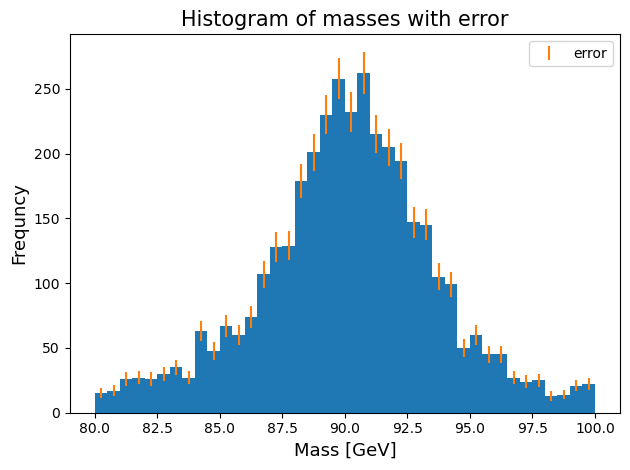

In [9]:
# Make the figure 
fig1, ax1 = plt.subplots()
bins = np.linspace(80, 100, 41)
n, bin, patches = ax1.hist(M, bins = bins)
bin_centers = ((bin[1:] - bin[:-1])/2)+ bin[:-1]
errors = np.sqrt(n)
ax1.errorbar(bin_centers, n, errors, linestyle = 'none', label = 'error')
ax1.set_xlabel('Mass [GeV]', size = 13) # NEEDS UNITS STILL
ax1.set_ylabel('Frequncy', size = 13)
ax1.set_title('Histogram of masses with error', size = 15)
ax1.legend()
fig1.tight_layout()

# Part 2

**Question 1**

In [12]:
# Decay distribution function
def D(m, m0, gamma):
    return gamma/((np.pi * 2) * ((m - m0)**2 + (gamma/2)**2))

**Question 2**

In [14]:
# fit the data
def D1(m, m0, gamma):
    return 2500 * gamma/((np.pi * 2) * ((m - m0)**2 + (gamma/2)**2))

# Create arrays of data that are only in the desired range
mask = (bin_centers > 87) & (bin_centers < 93)
Mass1 = bin_centers[mask]
Frequency1 = n[mask]
errors1 = errors[mask]
params, covar = curve_fit(f = D1, xdata = Mass1, ydata = Frequency1, sigma = errors1, absolute_sigma = True)

**Question 3**

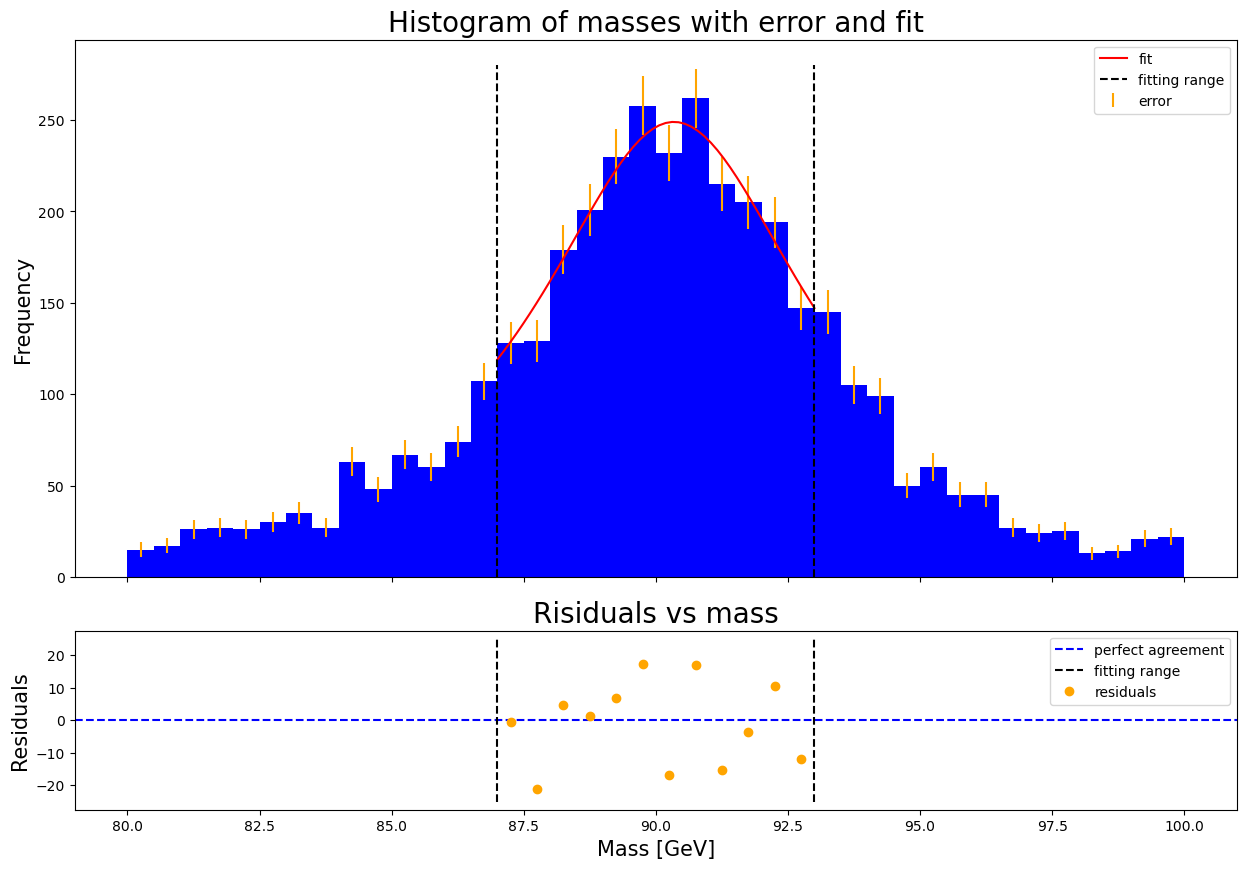

In [16]:
# Create an array of dummy mass values 
m_array = np.linspace(87, 93, 50)
# Plug the dummy array of mass values into the fit
D_fit = D1(m_array, *params)

# Residuals
D_theory = D1(Mass1, *params)
Residuals = Frequency1 - D_theory

# Create the figure
fig2, [ax2_top, ax2_bottom] = plt.subplots(2, 1, sharex = True, figsize = (15, 10), 
                                        gridspec_kw = {'height_ratios': [3,1], 'hspace' : 0.15})
ax2_top.hist(M, bins = bins, color = 'blue')
ax2_top.errorbar(bin_centers, n, errors, linestyle = 'none', color = 'orange', label = 'error')
ax2_top.plot(m_array, D_fit, color = 'red', label = 'fit')
ax2_top.vlines([87, 93], 0, 280, color = 'black', ls = '--', label = 'fitting range')
ax2_bottom.axhline(0, color = 'blue', ls = '--', label = 'perfect agreement')
ax2_bottom.vlines([87, 93], -25, 25, color = 'black', ls = '--', label = 'fitting range')
ax2_bottom.plot(Mass1, Residuals, marker = 'o', color = 'orange', linestyle = 'none', label = 'residuals') 
ax2_bottom.set_xlabel('Mass [GeV]', size = 15)
ax2_top.set_ylabel('Frequency', size = 15)
ax2_bottom.set_ylabel('Residuals', size = 15)
ax2_top.legend()
ax2_bottom.legend()
ax2_bottom.set_title('Risiduals vs mass', size = 20)
ax2_top.set_title('Histogram of masses with error and fit', size = 20);

**Question 4**

In [18]:
# Calculate the chi square value, reduced chi square value, and p-value

chisq = (((Residuals)/errors1)**2).sum()
fit_params = len(params) # two fit parameters (m0, and gamma)
dof = len(Residuals - fit_params)
red_chisq = chisq/dof
p_value = st.chi2.sf(chisq, dof)

print(f"The chi square value is {chisq}.\nThe reduced chi square value is {red_chisq}.\nThe p-value is {p_value}.")

The chi square value is 9.985097164263733.
The reduced chi square value is 0.8320914303553111.
The p-value is 0.6172681331057557.


**Question 5**

In [20]:
# Extract the fit errors from the covariance matrix
fit_errors = np.sqrt(np.diag(covar))

# Best fit m0 and error
best_fit_m0 = params[0]
best_fit_m0_unc = fit_errors[0]

print(f"The best fit m0 is {best_fit_m0} +_ {best_fit_m0_unc}")

The best fit m0 is 90.3408058601808 +_ 0.09351482696789093


**Question 6**

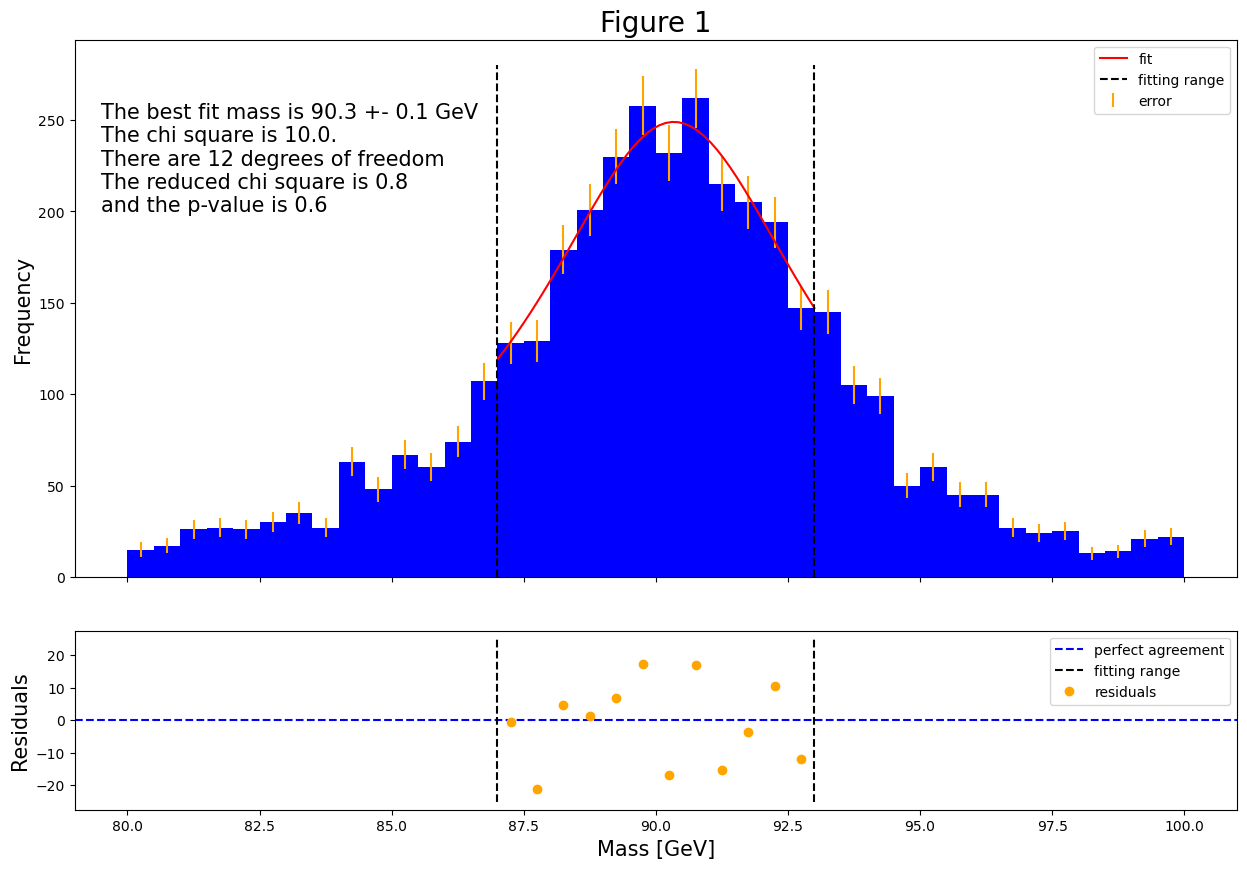

In [22]:
# Create the figure
fig3, [ax3_top, ax3_bottom] = plt.subplots(2, 1, sharex = True, figsize = (15, 10), 
                                        gridspec_kw = {'height_ratios': [3,1], 'hspace' : 0.15})
ax3_top.hist(M, bins = bins, color = 'blue')
ax3_top.errorbar(bin_centers, n, errors, linestyle = 'none', color = 'orange', label = 'error')
ax3_top.plot(m_array, D_fit, color = 'red', label = 'fit')
ax3_top.vlines([87, 93], 0, 280, color = 'black', ls = '--', label = 'fitting range')
ax3_bottom.axhline(0, color = 'blue', ls = '--', label = 'perfect agreement')
ax3_bottom.vlines([87, 93], -25, 25, color = 'black', ls = '--', label = 'fitting range')
ax3_bottom.plot(Mass1, Residuals, marker = 'o', color = 'orange', linestyle = 'none', label = 'residuals') 
ax3_bottom.set_xlabel('Mass [GeV]', size = 15)
ax3_top.set_ylabel('Frequency', size = 15)
ax3_bottom.set_ylabel('Residuals', size = 15)
ax3_top.legend()
ax3_bottom.legend()
ax3_top.set_title('Figure 1', size = 20)
ax3_top.text(79.5, 200, f"The best fit mass is {best_fit_m0:.1f} +- {best_fit_m0_unc:.1f} GeV\n"
             f"The chi square is {chisq:.1f}.\nThere are {dof} degrees of freedom\n"
             f"The reduced chi square is {red_chisq:.1f}\nand the p-value is {p_value:.1f}", size =15);

# Part 3

**Question 1**

In [25]:
# 2D chi square fit
bins3 = 300
m0_range = np.linspace(89, 91, bins3) # GeV
gamma_range = np.linspace(5, 8, bins3) # GeV
chi2_map = np.zeros((bins3, bins3))

for i in range(bins3):
    for j in range(bins3):
        theory3 = D1(Mass1, m0_range[i], gamma_range[j])
        chi2_3 = np.sum(((theory3 - Frequency1)/errors1)**2)
        chi2_map[j, i] = chi2_3

**Questions 2, 3, and 4**

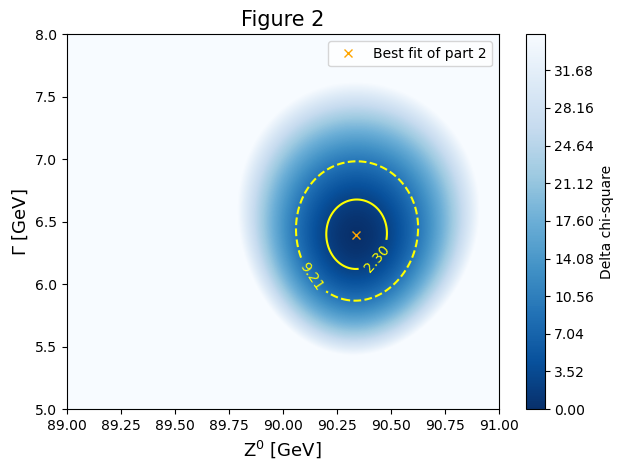

In [27]:
# Question 2
chi2_min = np.min(chi2_map)
chi2_map = np.clip(chi2_map, chi2_min, chi2_min+35) # clip to 35
delta_chi2_map = chi2_map - chi2_min

# Create the contour plot
X, Y = np.meshgrid(m0_range, gamma_range)
fig4, ax4 = plt.subplots()
cs = ax4.contourf(X, Y, delta_chi2_map, 500, cmap= 'Blues_r')
cbar = fig4.colorbar(cs, ax = ax4)
cbar.set_label("Delta chi-square")

# Question 3
# Add the sigma levels and make the plot look nicer
levels = [2.30, 9.21]
CS = ax4.contour(X, Y, delta_chi2_map, levels = levels, colors = ["yellow", "yellow"], 
                   linestyles = ['solid', 'dashed'])
ax4.clabel(CS, levels)
ax4.plot(params[0], params[1], marker = 'x', linestyle = 'none', color = 'orange', label = 'Best fit of part 2')
ax4.set_title('Figure 2', size = 15)
ax4.set_xlabel('Z$^0$ [GeV]', size = 13)
ax4.set_ylabel(r'$\Gamma$ [GeV]', size = 13)
ax4.legend()
fig4.tight_layout()

# Conclusion calculations

In [29]:
# Calculate how well the fit value agrees with the accepted PDG value of true rest mass.

accepted_m0 = 91.1880 # GeV
accepted_m0_unc = 0.002 # GeV

# perform a ratio test to see if the difference in the values are consitant with 0.
difference = abs(best_fit_m0 - accepted_m0)
difference_unc = np.sqrt(accepted_m0**2 + best_fit_m0_unc**2)
ratio = difference/difference_unc
print('The ratio of the difference between the accepted and fit true rest mass values \n'
      'to the uncertainty in the difference between the accepted and fit\ntrue rest mass values is', ratio)

The ratio of the difference between the accepted and fit true rest mass values 
to the uncertainty in the difference between the accepted and fit
true rest mass values is 0.009290626994001294
